# 플롯 범례 맞춤 변경하기

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

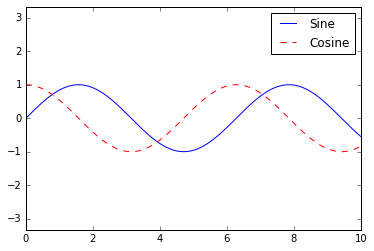

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend()

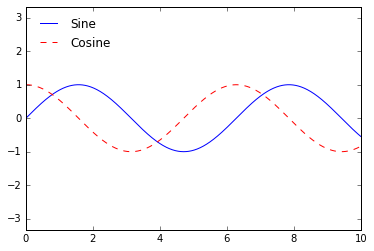

In [4]:
ax.legend(loc = 'upper left', frameon = False)
fig

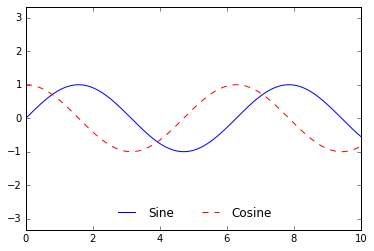

In [5]:
ax.legend(frameon = False, loc = 'lower center', ncol = 2)
fig

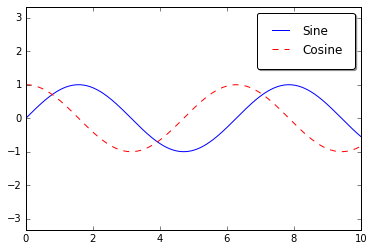

In [6]:
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1)
fig

## 범례에 사용할 요소 선택하기

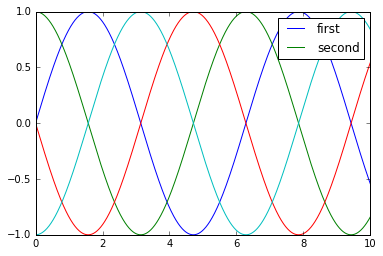

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# 라인은 plt.line2D의 인스터스의 목록이다.
plt.legend(lines[:2], ['first', 'second'])

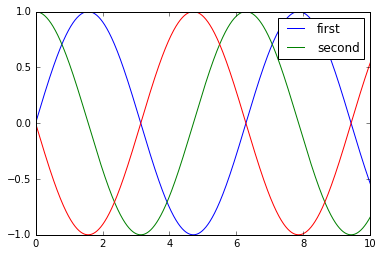

In [8]:
plt.plot(x, y[:, 0], label = 'first')
plt.plot(x, y[:, 1], label = 'second')
plt.plot(x, y[:, 2])
plt.legend(framealpha = 1, frameon = True)

## 점 크기에 대한 범례

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()


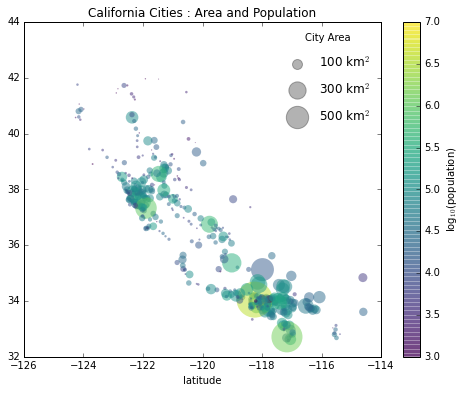

In [9]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

# 관심 있는 데이터 추출
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 레이블은 없지만 크기와 색상을 사용해 점을 뿌림
plt.figure(figsize = (8, 6))
plt.scatter(lon, lat, label = None, c = np.log10(population), cmap = 'viridis', s = area, linewidth = 0, alpha = 0.5)
plt.axis(aspect = 'equal')
plt.xlabel('longitude')
plt.xlabel('latitude')
plt.colorbar(label = 'log$_{10}$(population)')
plt.clim(3, 7)

# 범례 생성
# 원하는 크기와 레이블 빈 리스트를 플로팅
for area in [100, 300, 500]:
    plt.scatter([], [], c = 'k', alpha = 0.3, s = area, label = str(area) + ' km$^2$')
    plt.legend(scatterpoints = 1, frameon = False, labelspacing = 1, title = 'City Area')
    plt.title('California Cities : Area and Population')

## 다중 범례

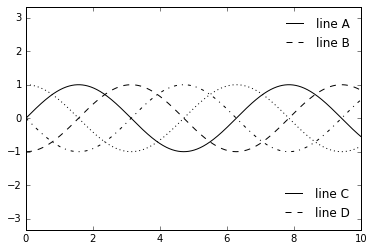

In [10]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color = 'black')
    
ax.axis('equal')

# 첫 번째 범례의 라인과 레이블을 지정
ax.legend(lines[:2], ['line A', 'line B'], loc = 'upper right', frameon = False)

# 두 번째 범례를 만들고 직접 아티스트를 추가
from matplotlib.legend import Legend
leg = Legend(ax, lines[:2], ['line C', 'line D'], loc = 'lower right', frameon = False)
ax.add_artist(leg)

## 색상 막대 맞춤 변경하기

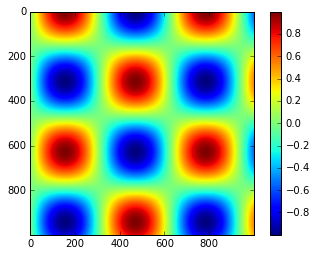

In [11]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

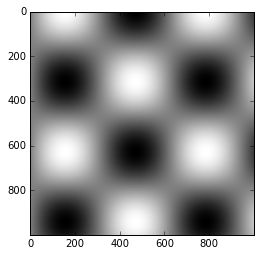

In [12]:
plt.imshow(I, cmap = 'gray')

### 색상 지도 선택하기

<b>순차적 색상 지도</b> :
하나의 연속적인 순서를 가지는 색상으로 구성되어 있다.

<b>발산적 색상 지도</b> :
일반적으로 평균을 기준으로 양수 및 음수 편차를 나타내느 두 가지 구별된 색상을 포함한다.

<b>정성적 색상 지도</b> :
특정 순서 없이 색을 혼합한다.

In [13]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    ''' 색상 지도의 회색조 버전을 반환'''
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # RGBA를 감지할 수 있는 회색조 밝기로 전환
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    ''' 색상 지도를 그에 상응하는 회색조 버전과 함께 플로팅'''
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize = (6, 2), subplot_kw = dict(xticks = [], yticks = []))
    ax[0].imshow([colors], extent = [0, 10, 0, 1])
    ax[1].imshow([grayscale], extent = [0, 10, 0, 1])

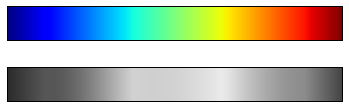

In [14]:
view_colormap('jet')

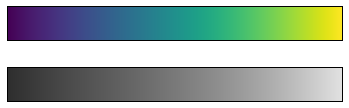

In [15]:
view_colormap('viridis')

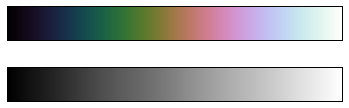

In [16]:
view_colormap('cubehelix')

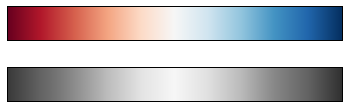

In [17]:
view_colormap('RdBu')

### 색상 한계 및 확장

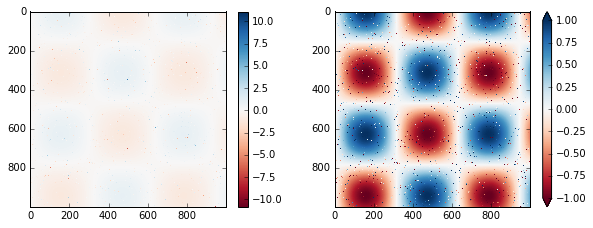

In [18]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize = (10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap = 'RdBu')
plt.colorbar(extend = 'both') # 노이즈에 영향 받는 이미지를 표시하는 경우에 유용
plt.clim(-1, 1)

### 불연속적인 색상 막대

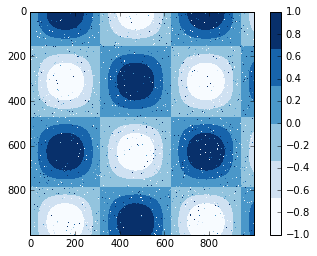

In [19]:
plt.imshow(I, cmap = plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

## 예제 : 손으로 쓴 숫자

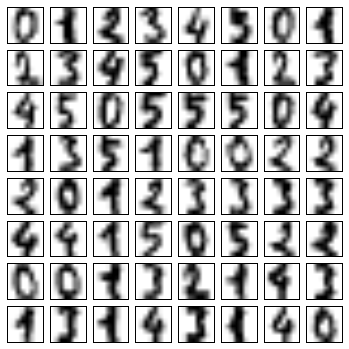

In [20]:
# 0 ~ 5까지 숫자의 이미지를 적재하고 그중 몇 가지를 시각화
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)

fig, ax = plt.subplots(8, 8, figsize = (6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap = 'binary')
    axi.set(xticks = [], yticks = [])

In [21]:
# IsoMap을 사용해 숫자를 2차원에 사영
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
projection = iso.fit_transform(digits.data)

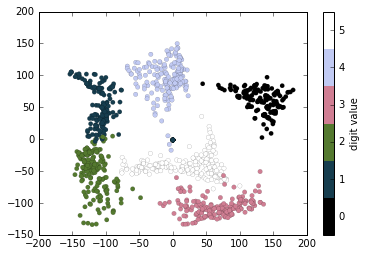

In [22]:
# 결과 플롯 그리기
plt.scatter(projection[:, 0], projection[:, 1], lw = 0.1, c = digits.target, cmap = plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks = range(6), label = 'digit value')
plt.clim(-0.5, 5.5)